# Writer Identification based on their Handwriting


In [37]:
#imports
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import os

In [15]:
#paths
IAM_PATH = "../IAM/all_forms/"
CVL_PATH = "../CVL/trainset/pages/"

In [16]:
#Given a path to a directory, randomly display the samples 
def display_rand_images(PATH, R=4, C=2):
    temp = 0
    MAX_SHOW = R * C
    
    #matplot figure configuration
    figure, axarr = plt.subplots(R,C)
    figure.set_figheight(R*14)
    figure.set_figwidth(C*10)
    
    #create a numpy array and shuffle
    filenames = np.array(os.listdir(PATH))
#     filenames = np.array(os.path.join('../CVL/trainset/words', '*'))
    np.random.shuffle(filenames)
    
    for filename in filenames[:MAX_SHOW]:
        handwriting_sample = mpimg.imread(PATH+filename)
        axarr[temp//C, temp%C].imshow(handwriting_sample, cmap='gray')
        temp+=1    

# IAM handwriting samples

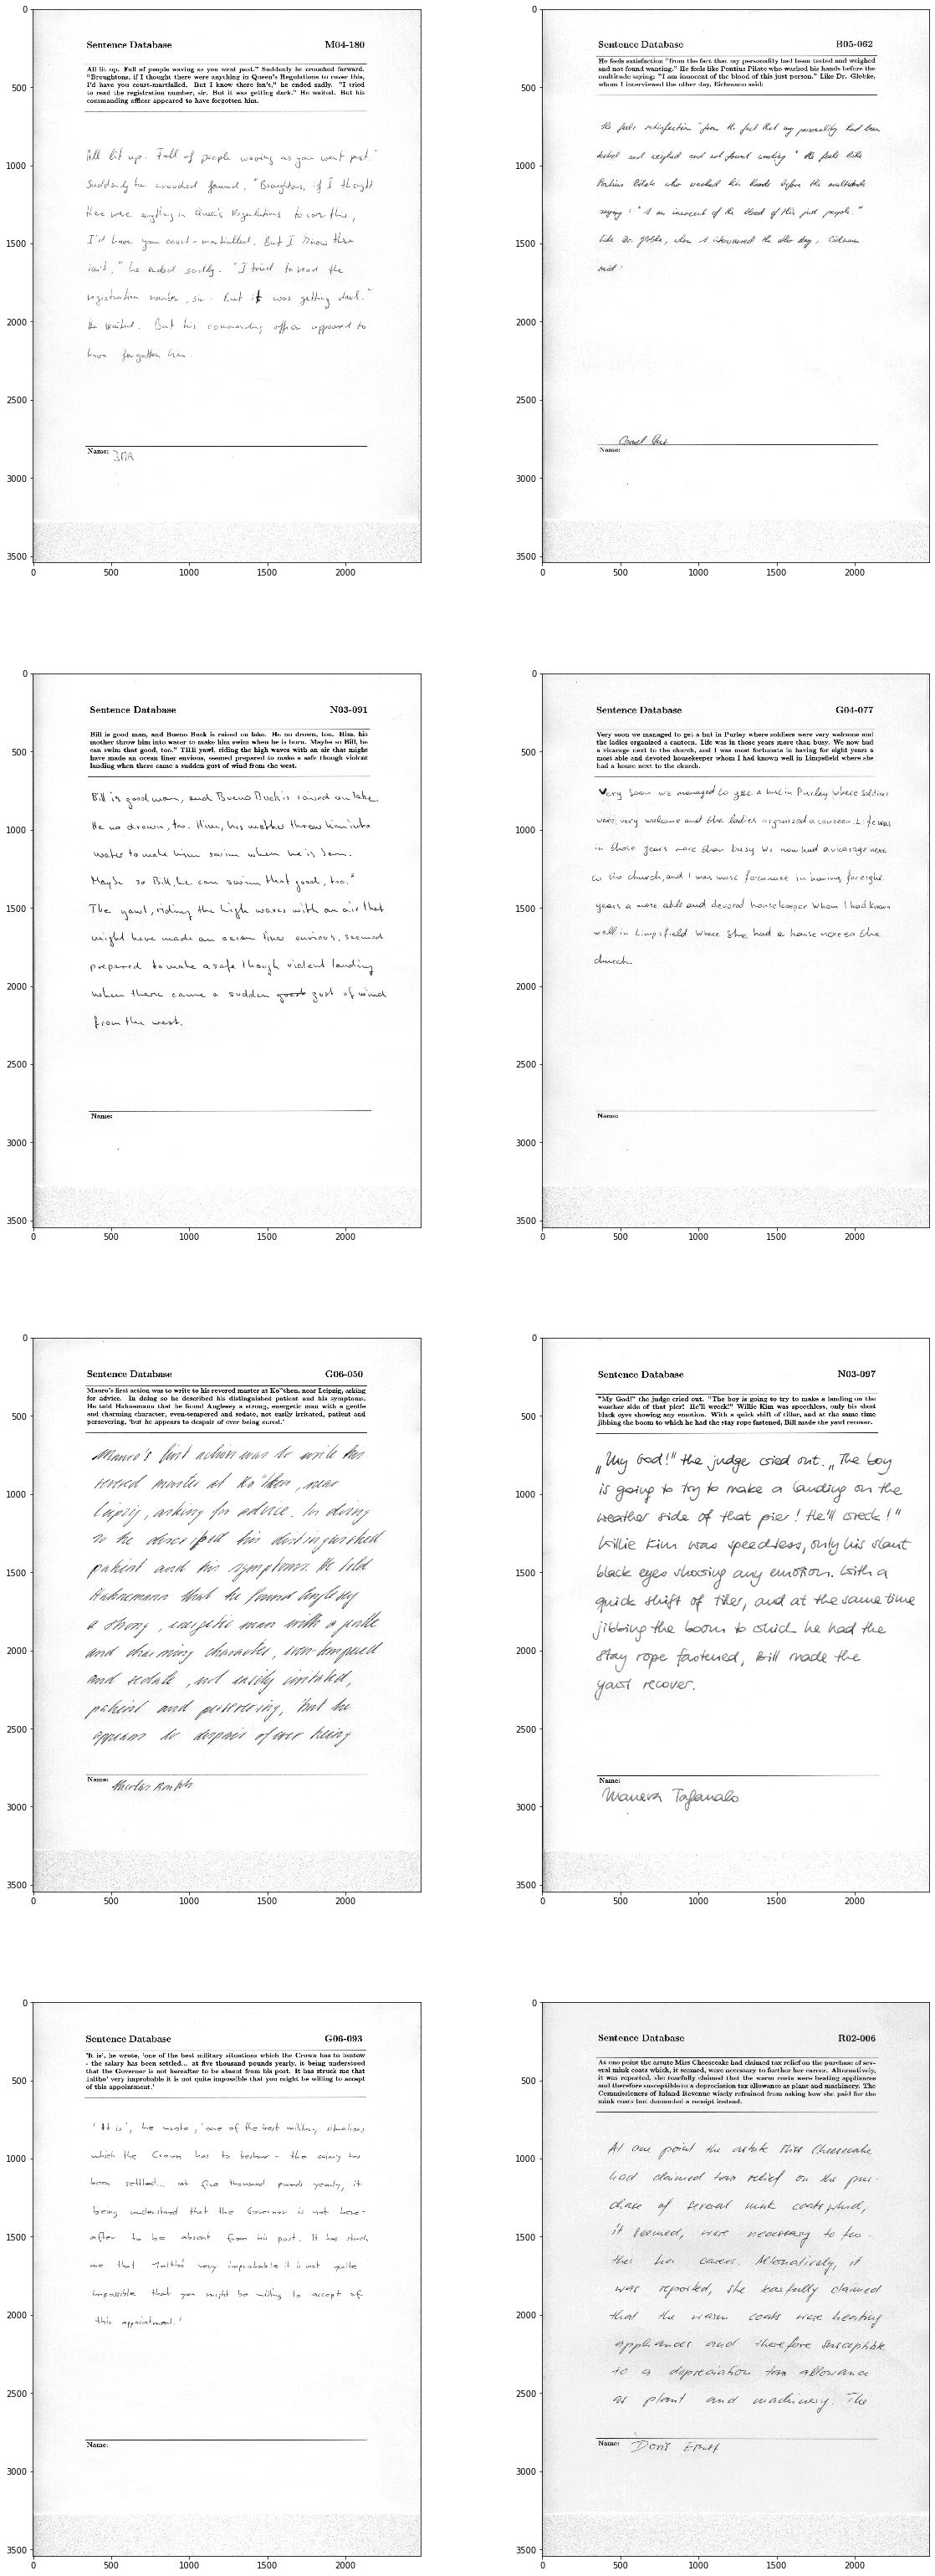

In [89]:
display_rand_images(IAM_PATH)

# CVL handwriting samples

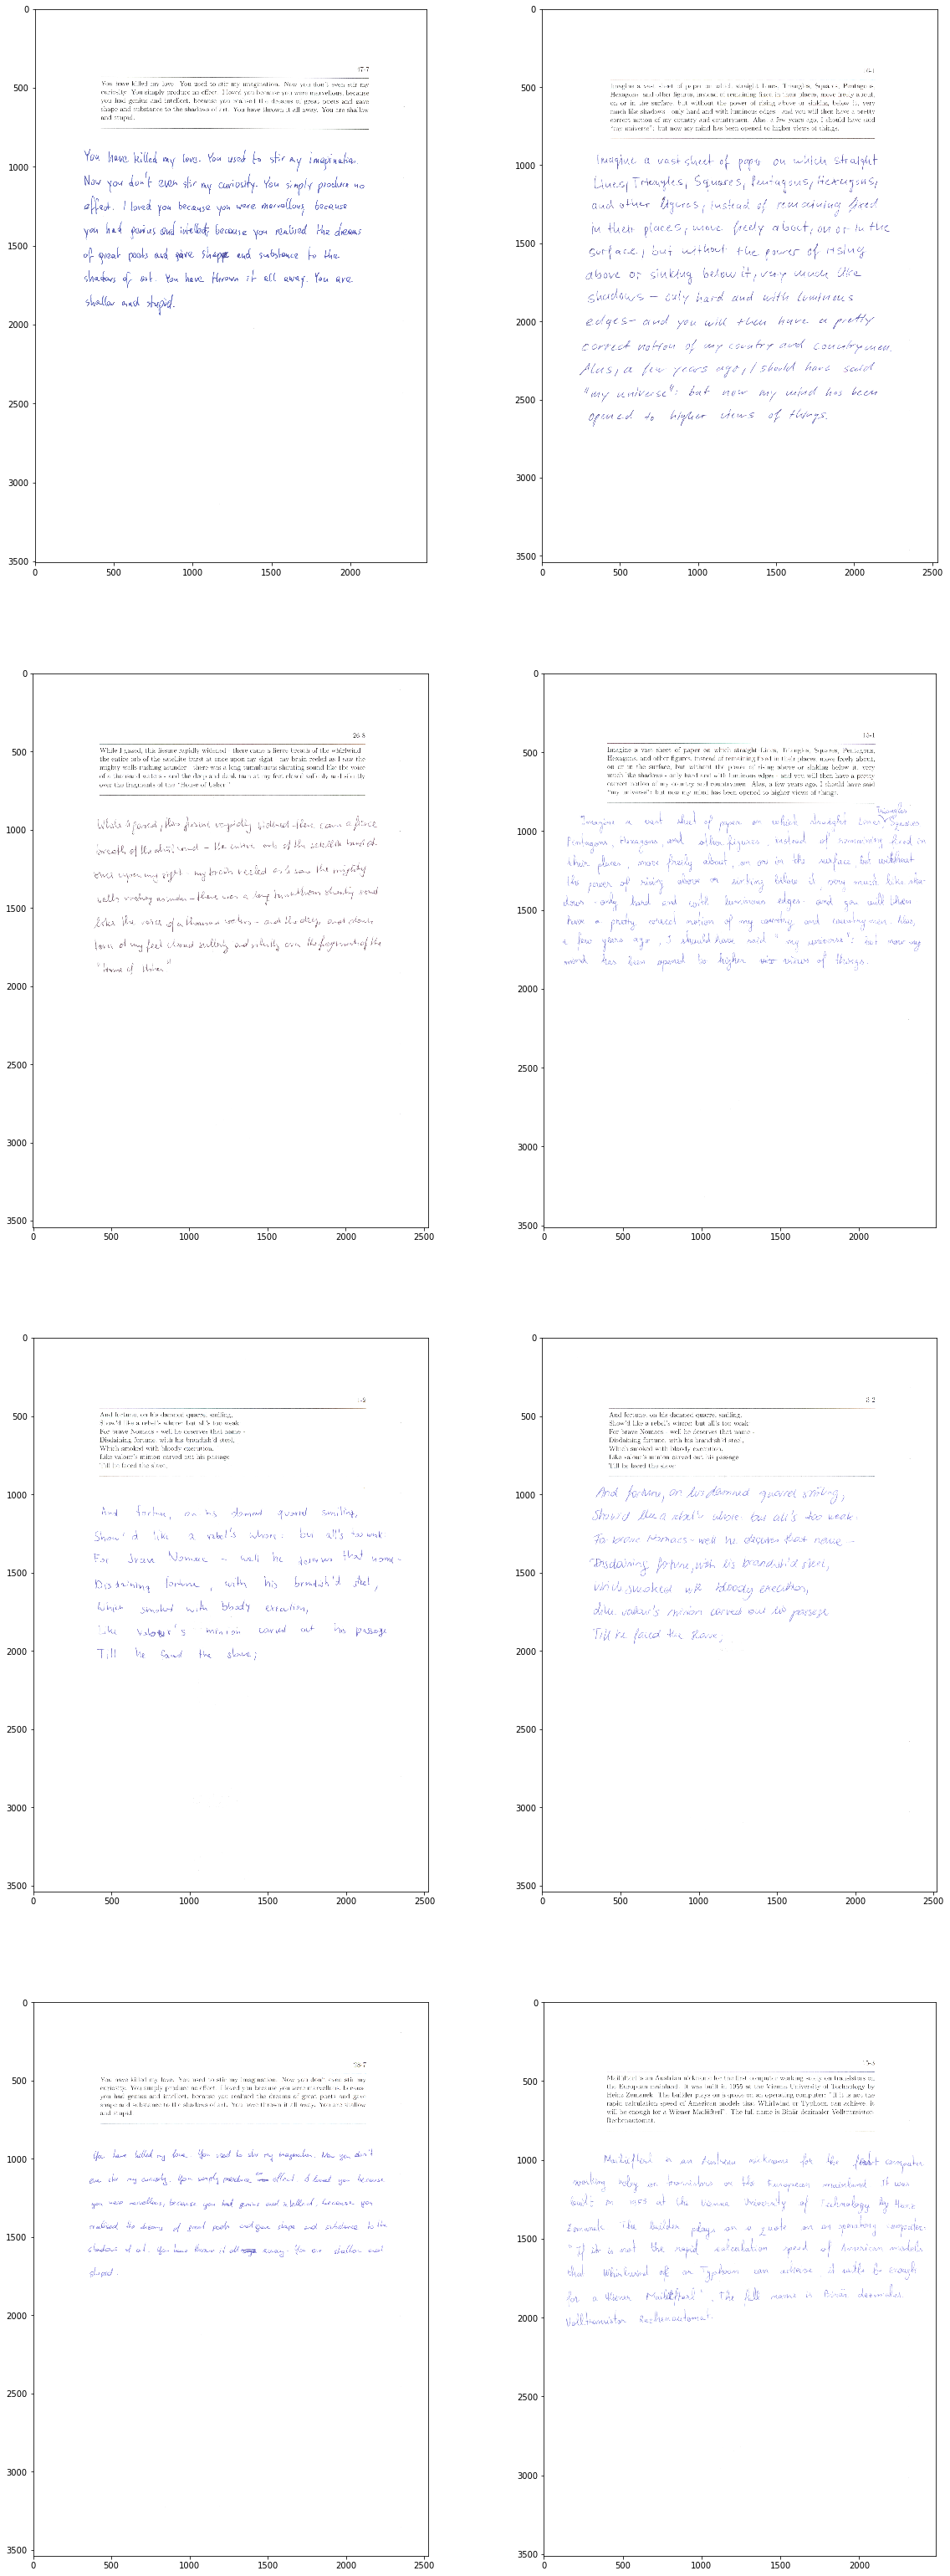

In [58]:
display_rand_images(CVL_PATH)

In [31]:
def parse_filenames(DATA_ORIGIN, filenames):
    writer_ids = []
    for filename in filenames:
        if DATA_ORIGIN == "IAM":
            next_id = filename.split('-')[1][:3]
            writer_ids.append(int(next_id))
        elif DATA_ORIGIN == "CVL":
            next_id = filename.split('-')[0]
    return writer_ids
# Given a path to a directory where the data lives, reads all handwriting samples
# and returns a tuple, where the first element is a numpy array of 
# writer ids and the second - a numpy array of each sample filename. 
# These two arrays correspond to each other.
def read_all_samples(DATA_ORIGIN, PATH):
    filenames = os.listdir(PATH)    
    writer_ids = parse_filenames(DATA_ORIGIN, filenames)    
    
    return (np.array(writer_ids), np.array(filenames))            

In [42]:
writer_ids_IAM, sample_filenames_IAM = read_all_samples(IAM_PATH)

[  6  33  61  87  75 111  37  57  42  18   5  42  82  96  95  17  26  55
  50 163 107 113 111   4  20  82  72 194  30  16  33   2 115  65  52  53
 159   0  22  21 131 170  42  56   8  51  44 105  50  40  84  33  26  16
  85  14  70  25  20 102  46 136  49 156 147  86  31  14  25 107  43  19
  47 113  96 189  18  18  95  42  42  78  37  98  87 138  30  87  39   7
  37  61  12 176  49 143  42 157   0  18 100 114 106 128  27  15   0  14
 140  79 169 182 109  66  20  97  92  30   0  28  11 120  17  23  68  22
   3  37 127  28 104 100  44  43 103   0  82   3  29  23 157  37   7  59
  17 182 187 121  46  75 169 180  38  53  68  91  56 138  12  69  30  50
  18  29  57  46 117  83  42  42  37  74 130 195  10  82  87  66 103  86
   0  16  42  36  89  37  64 135  39  56  18  20  34 103  22  79 100  54
  40 154 140  33   3   7 105 125 186 131 124  21  20  79  80 163  12 137
  68  45 114   0 124   7  32  88   4  93  30  87  56  84  52 106  61  64
  70   4  62 119 152  76 102   4  39  38 169 110 15

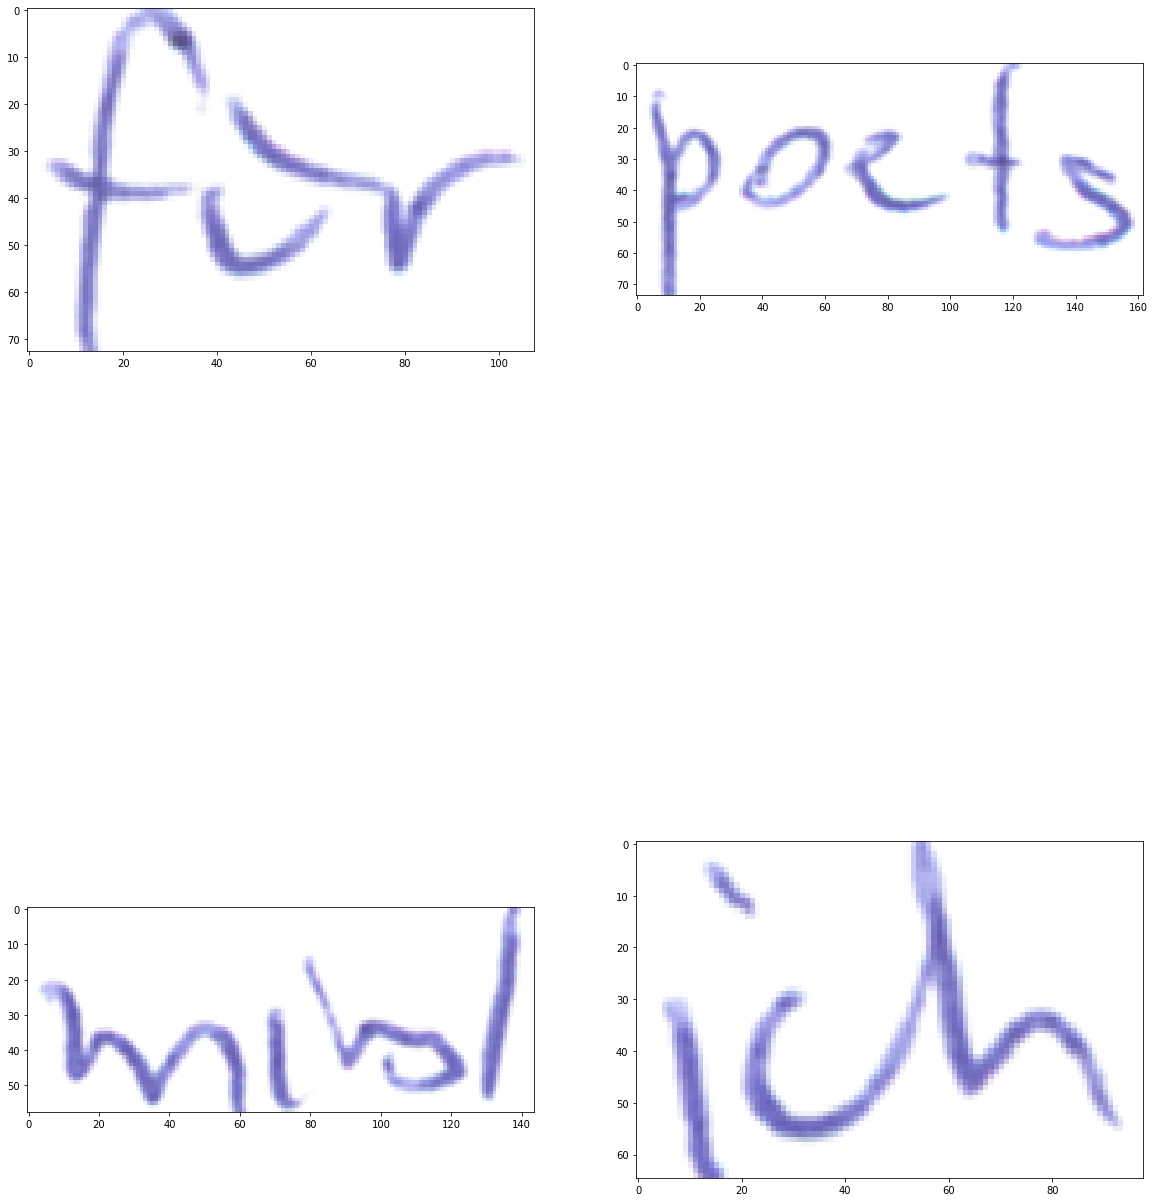

In [72]:
#next steps:
#load words from 
display_rand_images("../CVL/trainset/lines/0001/", 2, 2)

In [18]:
import cv2

#####DONT NEED THIS CELL
#THIS ONE CONCATENATES WORDS
def resize_image(img, NEW_HEIGHT):
    h,w = img.shape
    NEW_WIDTH = int((w/h)*NEW_HEIGHT)
    return cv2.resize(img, (NEW_WIDTH, NEW_HEIGHT), interpolation = cv2.INTER_AREA)
    
def concatenate_images(NEW_HEIGHT):
    PATH = "../CVL/trainset/words/0002/"
    count = 0;
    writer_ids, sample_filenames = read_all_samples("CVL", PATH)
    concatenated_image = cv2.imread(PATH+sample_filenames[0], cv2.IMREAD_GRAYSCALE)
    concatenated_image = resize_image(concatenated_image, NEW_HEIGHT)

    for filename in sample_filenames[1:]:
        count+=1
        if(count>10):
            break
        next_image = cv2.imread(PATH+filename, cv2.IMREAD_GRAYSCALE)
        print("OG:", next_image.shape)
        
        resized_image = resize_image(next_image, NEW_HEIGHT)
        
#         print(resized_image.shape)
#         print(concatenated_image.shape, resized_image.shape)
        concatenated_image = cv2.hconcat([concatenated_image, resized_image])
        
    plt.figure(figsize=(20,10))
    plt.imshow(concatenated_image, cmap='gray')

#         plt.figure(figsize=(10,10))
#         plt.imshow(resized_image, cmap='gray')

OG: (86, 62)
(60, 43)
OG: (66, 86)
(60, 78)
OG: (56, 110)
(60, 117)
OG: (113, 144)
(60, 76)
OG: (60, 174)
(60, 174)
OG: (64, 70)
(60, 65)
OG: (114, 154)
(60, 81)
OG: (108, 73)
(60, 40)
OG: (47, 100)
(60, 127)
OG: (85, 138)
(60, 97)


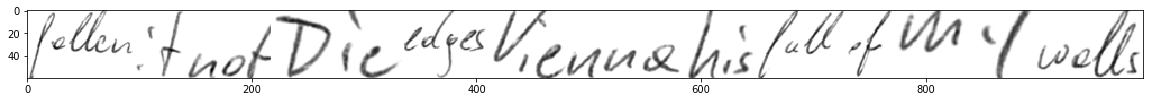

In [135]:
concatenate_images(60)

In [38]:
import cv2
def resize_image_to_width(img, NEW_WIDTH):
    h,w = img.shape
    NEW_HEIGHT = int((h/w)*NEW_WIDTH)
    return cv2.resize(img, (NEW_WIDTH, NEW_HEIGHT), interpolation = cv2.INTER_AREA)

#THIS ONE CONCATENATES LINES
def concatenate_lines(PATH, NEW_WIDTH):
    writer_ids, sample_filenames = read_all_samples("CVL", PATH)
    np.random.shuffle(sample_filenames)
    
    concatenated_image = cv2.imread(PATH+sample_filenames[0], cv2.IMREAD_GRAYSCALE)
    concatenated_image = resize_image_to_width(concatenated_image, NEW_WIDTH)
    
    for filename in sample_filenames[1:]:
        next_image = cv2.imread(PATH+filename, cv2.IMREAD_GRAYSCALE)
#         print("OG:", next_image.shape)
        if(next_image.shape[1] < NEW_WIDTH):
            continue
            
        resized_image = resize_image_to_width(next_image, NEW_WIDTH)      
#         print(resized_image.shape)
        concatenated_image = cv2.vconcat([concatenated_image, resized_image])
        
#     plt.figure(figsize=(10,20))
#     plt.imshow(concatenated_image, cmap='gray')
    return concatenated_image

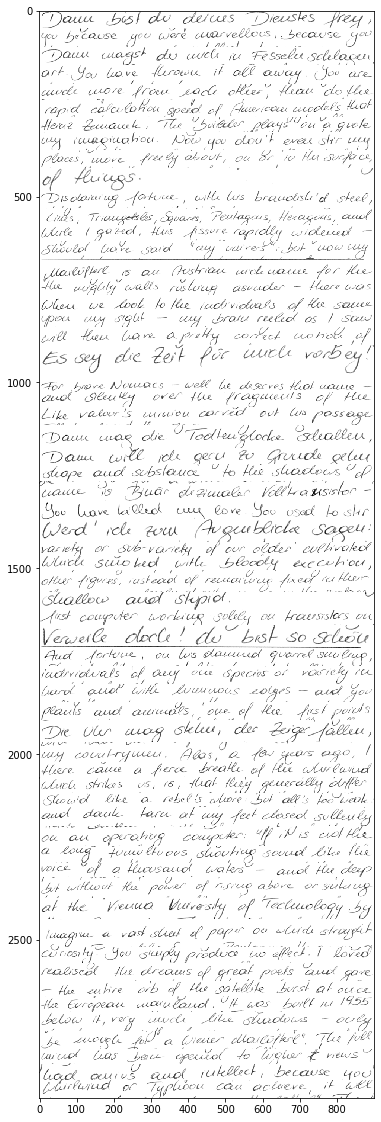

In [22]:
img = concatenate_lines("../CVL/trainset/lines/0027/", 900)
plt.figure(figsize=(10, 20))
plt.imshow(img, cmap='gray' )

In [39]:
def split_image(img):
    images = []
    h, w = img.shape
    left = img[:, :w//3]
    mid = img[:, w//3:2*w//3]
    right = img[:, 2*w//3:]
    
    fixed_height = w//3
    for i in range(h//fixed_height-2):
        images.append(left[i*fixed_height:(i+1)*fixed_height, :])
        images.append(mid[(i+1)*fixed_height:(i+2)*fixed_height, :])
        images.append(right[(i+2)*fixed_height:(i+3)*fixed_height, :])
        
#     plt.figure(figsize=(10, 20))
#     plt.imshow(right, cmap='gray')
#     plt.imshow(mid, cmap='gray')
#     plt.imshow(left, cmap='gray')
    
    return images
#     plt.imshow(right)

images = split_image(img)

NameError: name 'img' is not defined

(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)
(300, 300)


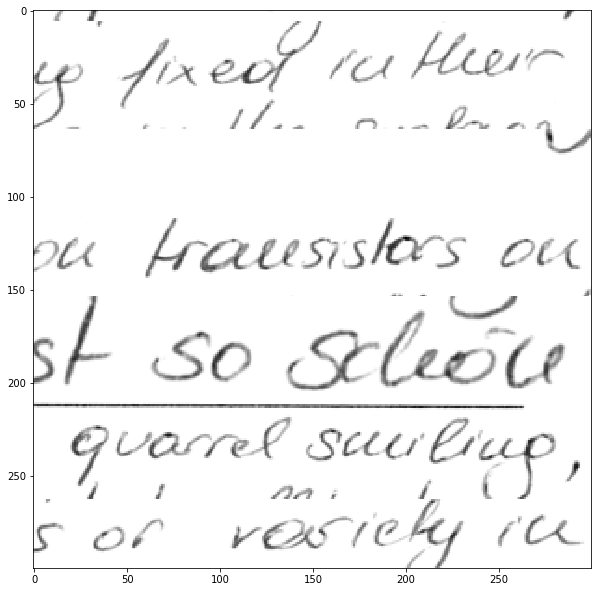

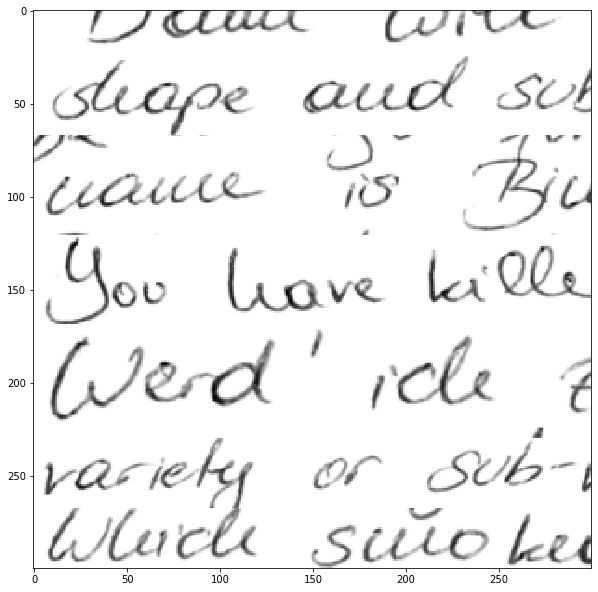

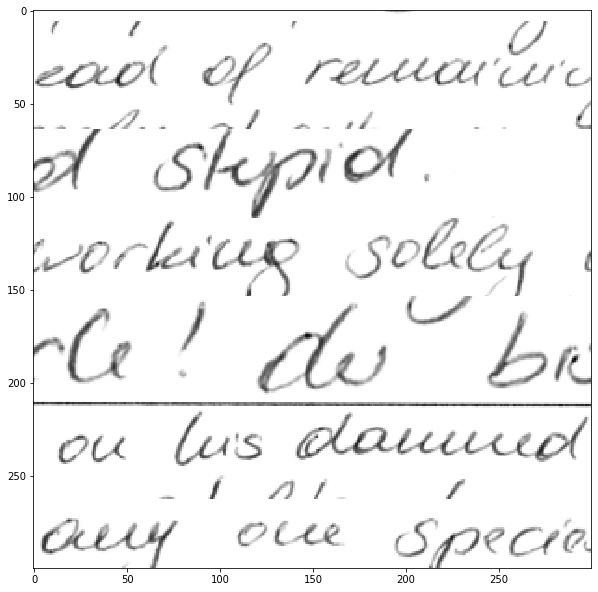

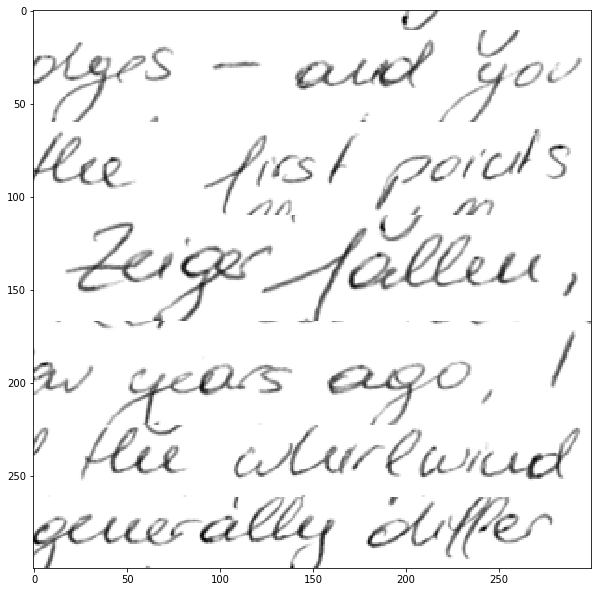

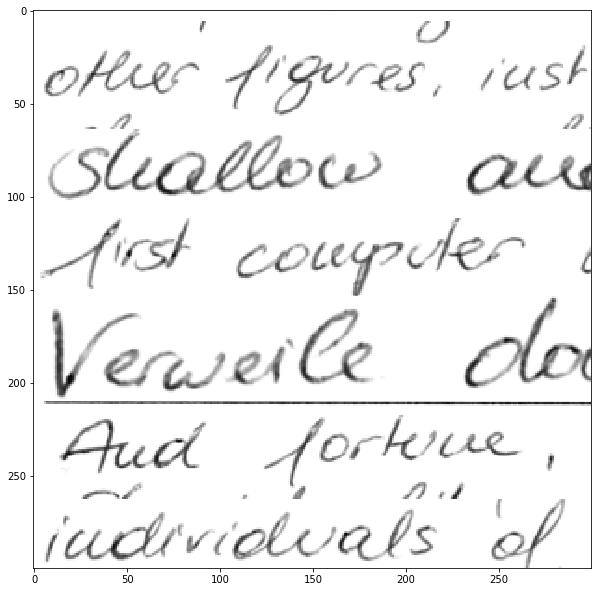

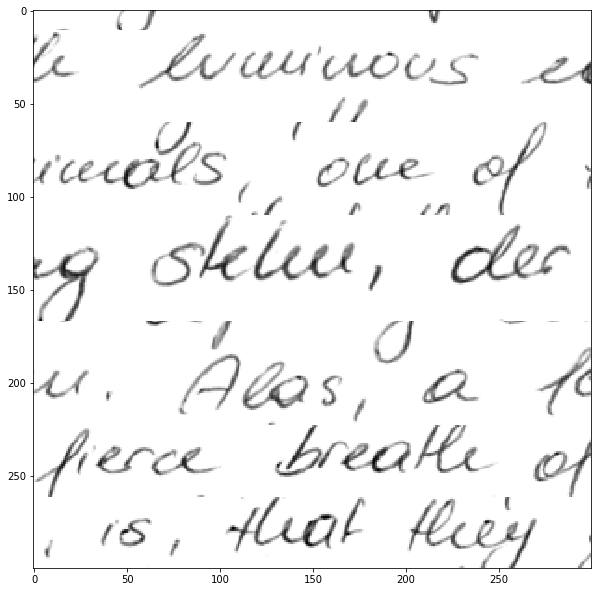

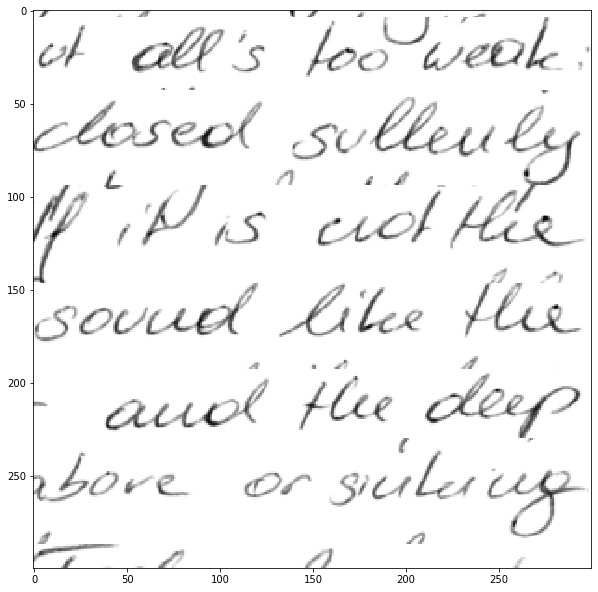

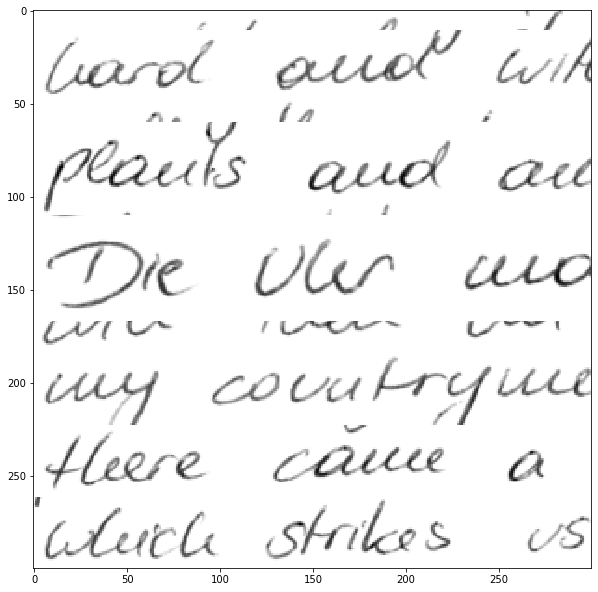

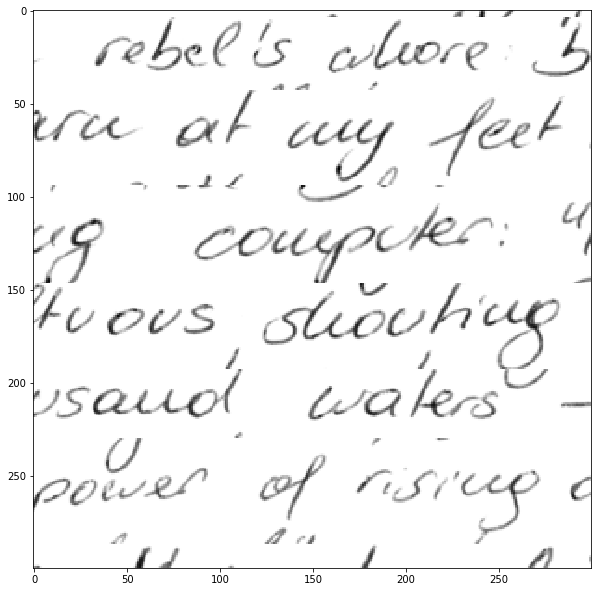

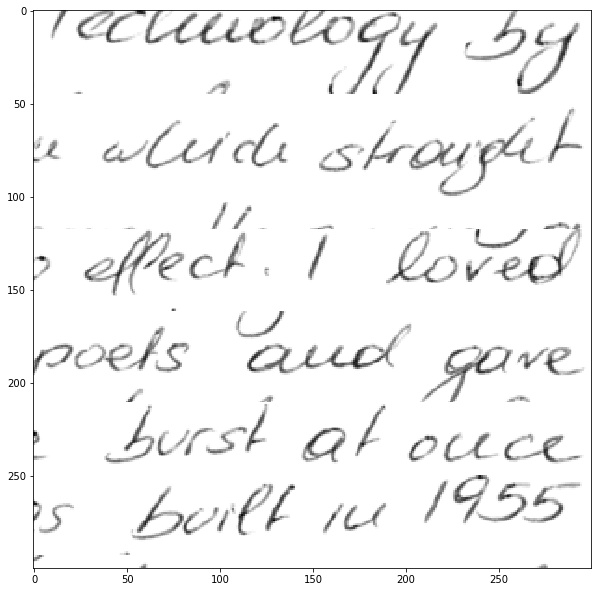

In [24]:

for i,image in enumerate(images):
    print(image.shape)
    if(i>10):
        plt.figure(figsize=(10, 20))
        plt.imshow(image, cmap='gray')
    if(image.size==0):
        print("HELOOO")
    
# print(len(images))

In [40]:
def save_images(PATH, writer_id, images):
    counter = 0
    os.mkdir(PATH+writer_id)
    for image in images:
        counter+=1
        filename = PATH+writer_id+'/'+writer_id+'-'+str(counter)+'.jpg'
        cv2.imwrite(filename, image)
# save_images("../CVL/processed/", "0002", images)

In [41]:
def create_patches(N):
    PATH = "../CVL/trainset/lines/"
    directories = os.listdir(PATH)
    for writer_id in directories:
        all_patches = []
        for i in range(N):
            conc_image = concatenate_lines(PATH+writer_id+'/', 900)
            mini_patches = split_image(conc_image)
            all_patches.extend(mini_patches)
        save_images("../CVL/processed/", writer_id, all_patches)
create_patches(10)

In [3]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.5)
data = datagen.flow_from_directory("../CVL/processed/", target_size=(900,900), batch_size=32)

Found 4458 images belonging to 27 classes.


[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[0.7058824  0.7058824  0.7058824 ]
  [0.8941177  0.8941177  0.8941177 ]
  [0.9686275  0.9686275  0.9686275 ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.76470596 0.76470596 0.76470596]
  [0.95294124 0.95294124 0.95294124]


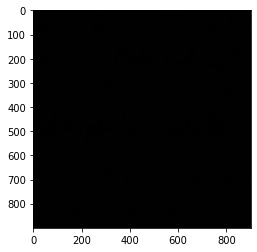

In [244]:
x,y = data.next()
im = x[0]
print(im)
plt.imshow(np.uint8(im), cmap='gray')

In [39]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(900, 900, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(27))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(data, epochs=1)

NameError: name 'data' is not defined

In [45]:
#FROM TENSORFLOW
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [46]:
import pathlib
data_dir = pathlib.Path("../CVL/processed")

In [47]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

8661


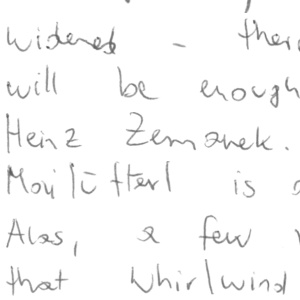

In [48]:
w1 = list(data_dir.glob('0001/*'))
PIL.Image.open(str(w1[0]))

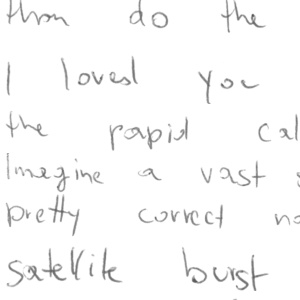

In [49]:
PIL.Image.open(str(w1[1]))

In [59]:
batch_size = 32
img_height = 300
img_width = 300

In [60]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 8661 files belonging to 27 classes.
Using 6929 files for training.


In [61]:
class_names = train_ds.class_names
print(class_names)

['0001', '0002', '0003', '0004', '0005', '0006', '0012', '0013', '0014', '0015', '0016', '0017', '0018', '0020', '0021', '0022', '0023', '0024', '0025', '0026', '0027', '0028', '0029', '0041', '0042', '0047', '0050']


In [62]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8661 files belonging to 27 classes.
Using 1732 files for validation.


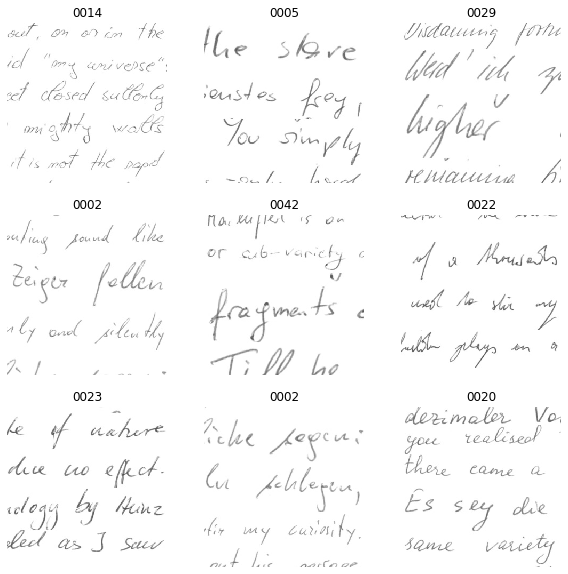

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [66]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 300, 300, 3)
(32,)


In [67]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [69]:
num_classes = 27
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [70]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
102/217 [=============>................] - ETA: 3:04 - loss: 3.4730 - accuracy: 0.0452

KeyboardInterrupt: 